In [437]:
import pandas as pd
import gmaps
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import linregress
from config import GMaps_API_Key
gmaps.configure(api_key=GMaps_API_Key)

In [438]:
obgyn_by_county = "obgyn_by_county.csv"
underlying_cause = "underlying_cause.csv"
population_data = "Population_DataHR.csv"
household_income_levels = "household-income-levels.csv"
median_income = "median-household-income.csv"
coordinates_csv = "county coordinates.csv"
underlying_cause_csv = "underlying_cause_final.csv"
obgyns_csv = "Indiana_OBGYNS_Final.csv"
obgyns_clean = "Indiana_OBGYNS_Clean.csv"
deaths_2018 = "2018 Deaths.csv"
merged = "MergedAgain.csv"
income = "income2016.csv"

In [439]:
obgyn_by_county_df = pd.read_csv(obgyn_by_county, encoding="ISO-8859-1")
underlying_cause_df = pd.read_csv(underlying_cause, encoding="ISO-8859-1")
population_data_df = pd.read_csv(population_data, encoding="ISO-8859-1")
household_income_levels_df = pd.read_csv(household_income_levels, encoding="ISO-8859-1")
median_income_df = pd.read_csv(median_income, encoding="ISO-8859-1")
coordinates_df = pd.read_csv(coordinates_csv, encoding="ISO-8859-1")
causes_df = pd.read_csv(underlying_cause_csv, encoding="ISO-8859-1")
obgyns_df = pd.read_csv(obgyns_csv, encoding="ISO-8859-1")
obgyns_clean_df = pd.read_csv(obgyns_clean, encoding="ISO-8859-1")
deaths_2018_df = pd.read_csv(deaths_2018, encoding="ISO-8859-1")
complete_df = pd.read_csv(merged, encoding="ISO-8859-1")
income_df = pd.read_csv(income, encoding="ISO-8859-1")

In [440]:
obgyn_by_county_df.head()

,County,Providers Count
0,ADAMS,5
1,ALLEN,182
2,BARTHOLOMEW,13
3,BOONE,8
4,CASS,6


In [441]:
obgyn_by_county_df.describe()

,Providers Count
count,68.000000
mean,28.750000
std,74.668496
min,1.000000
25%,4.000000
50%,9.000000
75%,22.000000
max,571.000000


In [442]:
underlying_cause_df.head()

,CNTY,CHILD_DEATH_YR,UNDERLYING_COD,CNT_BY_UNDERLYING_COD,CNTY_YR_DEATH_TOTAL,PCT_CNTY_YR_TOTAL,CHILD_DEATH_CNTY_POP,CNTY_YR_DEATH_TOTAL_PER_10000_CNTY_RES
0,ADAMS,2010,Other specified noninfective disorders of lymp...,1,4,25.0,34387,1.16
1,ADAMS,2010,Unspecified pulmonary hemorrhage originating i...,1,4,25.0,34387,1.16
2,ADAMS,2010,"Congenital malformation of the heart, unspecified",1,4,25.0,34387,1.16
3,ADAMS,2010,"Polycystic kidney, unspecified",1,4,25.0,34387,1.16
4,ADAMS,2011,Primary atelectasis of newborn,1,5,20.0,34384,1.45


In [443]:
underlying_cause_df.describe()

,CHILD_DEATH_YR,CNT_BY_UNDERLYING_COD,CNTY_YR_DEATH_TOTAL,PCT_CNTY_YR_TOTAL,CHILD_DEATH_CNTY_POP,CNTY_YR_DEATH_TOTAL_PER_10000_CNTY_RES
count,2393.000000,2393.000000,2393.000000,2393.000000,2393.000000,2393.000000
mean,2014.029252,1.193481,16.910990,24.713725,272709.632679,0.661463
std,2.531239,0.717501,21.224887,26.714584,308761.865396,0.340800
min,2010.000000,1.000000,1.000000,1.388800,8166.000000,0.050000
25%,2012.000000,1.000000,3.000000,6.250000,44013.000000,0.440000
50%,2014.000000,1.000000,7.000000,16.666600,143535.000000,0.620000
75%,2016.000000,1.000000,19.000000,33.333300,363265.000000,0.770000
max,2018.000000,11.000000,72.000000,100.000000,941229.000000,3.150000


In [444]:
population_data_df.head()

,Unnamed: 0,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,"308,745,538","308,758,105","309,321,666","311,556,874","313,830,990","315,993,715","318,301,008","320,635,163","322,941,311","324,985,539","326,687,501","328,239,523"
1,Northeast,"55,317,240","55,318,443","55,380,134","55,604,223","55,775,216","55,901,806","56,006,011","56,034,684","56,042,330","56,059,240","56,046,620","55,982,803"
2,Midwest,"66,927,001","66,929,725","66,974,416","67,157,800","67,336,743","67,560,379","67,745,167","67,860,583","67,987,540","68,126,781","68,236,628","68,329,004"
3,South,"114,555,744","114,563,030","114,866,680","116,006,522","117,241,208","118,364,400","119,624,037","120,997,341","122,351,760","123,542,189","124,569,433","125,580,448"
4,West,"71,945,553","71,946,907","72,100,436","72,788,329","73,477,823","74,167,130","74,925,793","75,742,555","76,559,681","77,257,329","77,834,820","78,347,268"


In [445]:
population_data_df.describe()

,Unnamed: 0,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,62,57,57,57,57,57,57,57,57,57,57,57,57
unique,62,57,57,57,57,57,57,57,57,57,57,57,57
top,West,"989,415","6,724,540","4,785,437","2,869,225","9,901,430","626,210","2,900,475","4,425,976","8,870,827","8,885,525","577,601","3,080,156"
freq,1,1,1,1,1,1,1,1,1,1,1,1,1


In [446]:
population_data_df

,Unnamed: 0,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,"308,745,538","308,758,105","309,321,666","311,556,874","313,830,990","315,993,715","318,301,008","320,635,163","322,941,311","324,985,539","326,687,501","328,239,523"
1,Northeast,"55,317,240","55,318,443","55,380,134","55,604,223","55,775,216","55,901,806","56,006,011","56,034,684","56,042,330","56,059,240","56,046,620","55,982,803"
2,Midwest,"66,927,001","66,929,725","66,974,416","67,157,800","67,336,743","67,560,379","67,745,167","67,860,583","67,987,540","68,126,781","68,236,628","68,329,004"
3,South,"114,555,744","114,563,030","114,866,680","116,006,522","117,241,208","118,364,400","119,624,037","120,997,341","122,351,760","123,542,189","124,569,433","125,580,448"
4,West,"71,945,553","71,946,907","72,100,436","72,788,329","73,477,823","74,167,130","74,925,793","75,742,555","76,559,681","77,257,329","77,834,820","78,347,268"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Note: The estimates are based on the 2010 Cens...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,Suggested Citation:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,Table 1. Annual Estimates of the Resident Popu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,"Source: U.S. Census Bureau, Population Division",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [447]:
household_income_levels_df.head()

,geoid,geoname,sumlev,year,table_id,table_line,description,est,moe
0,04000US18,Indiana,40,2009,B19001,1,HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN INF...,2468006,7798
1,04000US18,Indiana,40,2009,B19001,2,HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN INF...,183110,2697
2,04000US18,Indiana,40,2009,B19001,3,HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN INF...,140573,2471
3,04000US18,Indiana,40,2009,B19001,4,HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN INF...,140059,2812
4,04000US18,Indiana,40,2009,B19001,5,HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN INF...,147019,2599


In [448]:
household_income_levels_df.describe()

,sumlev,year,table_line,est,moe
count,545275.000000,545275.000000,545275.000000,5.452750e+05,545275.000000
mean,235.294528,2012.510304,9.000000,7.728901e+02,87.188991
std,261.373177,2.288169,4.898984,1.110445e+04,113.291765
min,40.000000,2009.000000,1.000000,0.000000e+00,2.000000
25%,60.000000,2011.000000,5.000000,2.800000e+01,27.000000
50%,140.000000,2013.000000,9.000000,8.800000e+01,56.000000
75%,160.000000,2015.000000,13.000000,2.720000e+02,106.000000
max,970.000000,2016.000000,17.000000,2.513828e+06,8128.000000


In [449]:
median_income_df.head()

,geoid,geoname,sumlev,year,table_id,table_line,description,est,moe
0,04000US18,Indiana,40,2009,B19013,1,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,47465.0,193.0
1,05000US18001,"Adams County, Indiana",50,2009,B19013,1,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,43208.0,2508.0
2,05000US18003,"Allen County, Indiana",50,2009,B19013,1,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,47901.0,799.0
3,05000US18005,"Bartholomew County, Indiana",50,2009,B19013,1,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,52545.0,1858.0
4,05000US18007,"Benton County, Indiana",50,2009,B19013,1,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,45603.0,2358.0


In [450]:
median_income_df.describe()

,sumlev,year,table_line,est,moe
count,36889.000000,36889.000000,36889.0,36682.000000,36668.000000
mean,224.163626,2012.704709,1.0,49696.370263,9142.744627
std,245.413460,2.191892,0.0,17720.245788,10337.963607
min,40.000000,2009.000000,1.0,3220.000000,193.000000
25%,140.000000,2011.000000,1.0,39167.000000,4019.000000
50%,140.000000,2013.000000,1.0,47598.000000,6684.000000
75%,160.000000,2014.000000,1.0,57631.250000,10857.250000
max,970.000000,2016.000000,1.0,250001.000000,347683.000000


In [451]:
coordinates_df.head()

,County,County Code,Code,Lat,Lng,CMS Factor,(meters),(meters).1,(meters).2,(meters).3
0,Adams,1,1,40.55,84.95,1.000034,"240,000","36,000","235,857.32","197,042.58"
1,Allen,2,2,40.90,85.05,1.000031,"240,000","36,000","244,142.67","158,173.88"
2,Bartholomew,3,3,39.00,85.85,1.000026,"240,000","36,000","310,425.25","369,491.12"
3,Benton,4,4,40.45,87.30,1.000029,"240,000","36,000","430,567.72","210,705.42"
4,Blackford,5,18-May,40.05,85.40,1.000038,"240,000","36,000","273,141.59","252,641.73"


In [452]:
coordinates_df.describe()

,County Code,Lat,Lng,CMS Factor
count,92.00000,92.000000,92.000000,92.000000
mean,46.50000,39.521196,86.241848,1.000029
std,26.70206,1.043616,0.829248,0.000007
min,1.00000,37.750000,84.900000,1.000013
25%,23.75000,38.650000,85.575000,1.000025
50%,46.50000,39.600000,86.225000,1.000029
75%,69.25000,40.475000,86.950000,1.000034
max,92.00000,41.500000,87.950000,1.000044


In [453]:
obgyn_by_county = pd.merge(coordinates_df, obgyn_by_county_df, on="County", how="outer" )
obgyn_by_county.head()

,County,County Code,Code,Lat,Lng,CMS Factor,(meters),(meters).1,(meters).2,(meters).3,Providers Count
0,Adams,1.0,1,40.55,84.95,1.000034,"240,000","36,000","235,857.32","197,042.58",NaN
1,Allen,2.0,2,40.90,85.05,1.000031,"240,000","36,000","244,142.67","158,173.88",NaN
2,Bartholomew,3.0,3,39.00,85.85,1.000026,"240,000","36,000","310,425.25","369,491.12",NaN
3,Benton,4.0,4,40.45,87.30,1.000029,"240,000","36,000","430,567.72","210,705.42",NaN
4,Blackford,5.0,18-May,40.05,85.40,1.000038,"240,000","36,000","273,141.59","252,641.73",NaN


In [454]:
obgyns_df.head()

,Unnamed: 0,Unnamed: 0.1,NPI,PAC ID,Professional Enrollment ID,Last Name,First Name,Middle Name,Suffix,Gender,...,Hospital affiliation CCN 2,Hospital affiliation LBN 2,Hospital affiliation CCN 3,Hospital affiliation LBN 3,Hospital affiliation CCN 4,Hospital affiliation LBN 4,Hospital affiliation CCN 5,Hospital affiliation LBN 5,Professional accepts Medicare Assignment,County
0,0,3167,1003082215,5991975641,I20170714000622,THOTA,SHARMILEE,NaN,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Montgomery County
1,1,11773,1003811217,4880611532,I20100816000979,SILVA,GUY,DUNCAN,NaN,M,...,150172.0,PHYSICIANS' MEDICAL CENTER LLC,NaN,NaN,NaN,NaN,NaN,NaN,Y,Floyd County
2,2,17046,1003880527,7113823758,I20100629000881,SINGH,GITA,NaN,NaN,F,...,360071.0,VAN WERT COUNTY HOSPITAL,150101.0,PARKVIEW WHITLEY HOSPITAL,150150.0,DUPONT HOSPITAL LLC,151330.0,ADAMS MEMORIAL HOSPITAL,Y,Allen County
3,3,24259,1013052794,345364709,I20100908000240,LEACHMAN HAAB,BRIANNA,NaN,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Tippecanoe County
4,4,31713,1013262195,547555203,I20160822000042,SIDES,CHARLES,C,NaN,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Vigo County


In [455]:
obgyns_df.count()

Unnamed: 0                                  753
Unnamed: 0.1                                753
NPI                                         753
PAC ID                                      753
Professional Enrollment ID                  753
Last Name                                   753
First Name                                  753
Middle Name                                 628
Suffix                                       11
Gender                                      753
Credential                                  299
Medical school name                         753
Graduation year                             751
Primary specialty                           753
Secondary specialty 1                        63
Secondary specialty 2                         4
Secondary specialty 3                         0
Secondary specialty 4                         0
All secondary specialties                    63
Organization legal name                     720
Group Practice PAC ID                   

In [456]:
grouped_obgyns = obgyns_df.groupby(['County'])
grouped_obgyns.head()

,Unnamed: 0,Unnamed: 0.1,NPI,PAC ID,Professional Enrollment ID,Last Name,First Name,Middle Name,Suffix,Gender,...,Hospital affiliation CCN 2,Hospital affiliation LBN 2,Hospital affiliation CCN 3,Hospital affiliation LBN 3,Hospital affiliation CCN 4,Hospital affiliation LBN 4,Hospital affiliation CCN 5,Hospital affiliation LBN 5,Professional accepts Medicare Assignment,County
0,0,3167,1003082215,5991975641,I20170714000622,THOTA,SHARMILEE,NaN,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Montgomery County
1,1,11773,1003811217,4880611532,I20100816000979,SILVA,GUY,DUNCAN,NaN,M,...,150172.0,PHYSICIANS' MEDICAL CENTER LLC,NaN,NaN,NaN,NaN,NaN,NaN,Y,Floyd County
2,2,17046,1003880527,7113823758,I20100629000881,SINGH,GITA,NaN,NaN,F,...,360071.0,VAN WERT COUNTY HOSPITAL,150101.0,PARKVIEW WHITLEY HOSPITAL,150150.0,DUPONT HOSPITAL LLC,151330.0,ADAMS MEMORIAL HOSPITAL,Y,Allen County
3,3,24259,1013052794,345364709,I20100908000240,LEACHMAN HAAB,BRIANNA,NaN,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Tippecanoe County
4,4,31713,1013262195,547555203,I20160822000042,SIDES,CHARLES,C,NaN,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Vigo County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,724,1020668,1457799363,7214151935,I20160714000500,MORSE,JESSICA,M,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Wells County
735,735,1345591,1609810563,6901882067,I20040928000204,NEELEY,KAREN,F,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Knox County
736,736,1379348,1629020078,7719932169,I20061220000328,HOKE,WILLIAM,ENLOE,JR.,M,...,150009.0,CLARK MEMORIAL HOSPITAL,150044.0,BAPTIST HEALTH FLOYD,NaN,NaN,NaN,NaN,Y,Dearborn County
749,749,2109765,1952304123,8022927631,I20100429000737,CONWELL,CARL,NaN,NaN,M,...,150023.0,UNION HOSPITAL INC,NaN,NaN,NaN,NaN,NaN,NaN,Y,Sullivan County


In [457]:
#obgyn_counts = pd.DataFrame(obgyns_clean_df, columns=['County','Professional Enrollment ID'])
obgyn_counts = obgyns_clean_df['County'].value_counts()
obgyn_df = pd.DataFrame(obgyn_counts)
obgyn_df

,County
Marion,188
Lake,61
Allen,60
St. Joseph,44
Warrick,30
...,...
Starke,1
Perry,1
Fulton,1
Huntington,1


In [458]:
docs_county = obgyn_df.reset_index()
docs_per_county = docs_county.rename(columns={"County": "OB/GYNS","index": "County"})
docs_per_county.head()

,County,OB/GYNS
0,Marion,188
1,Lake,61
2,Allen,60
3,St. Joseph,44
4,Warrick,30


In [459]:
obgyns_df.describe()

,Unnamed: 0,Unnamed: 0.1,NPI,PAC ID,Graduation year,Secondary specialty 3,Secondary specialty 4,Group Practice PAC ID,Number of Group Practice members,Zip,Zip Code,Phone Number,Hospital affiliation CCN 1,Hospital affiliation CCN 2,Hospital affiliation CCN 3,Hospital affiliation CCN 4,Hospital affiliation CCN 5
count,753.000000,7.530000e+02,7.530000e+02,7.530000e+02,751.000000,0.0,0.0,7.200000e+02,720.000000,753.000000,7.530000e+02,6.580000e+02,632.000000,212.000000,70.000000,23.000000,10.000000
mean,376.000000,1.146126e+06,1.516229e+09,5.159460e+09,1996.972037,NaN,NaN,4.602600e+09,298.501389,46736.123506,4.673650e+08,3.565828e+11,152064.549051,155996.009434,151318.757143,152804.739130,170341.700000
std,217.516666,6.508895e+05,2.920749e+08,2.851779e+09,11.344098,NaN,NaN,2.750631e+09,355.417183,586.759120,5.867782e+06,4.066639e+12,22793.736612,38510.473078,8585.767513,17085.085408,66742.256601
min,0.000000,3.167000e+03,1.003082e+09,4.210153e+07,1961.000000,NaN,NaN,4.252606e+07,2.000000,46011.000000,4.601134e+08,2.062665e+09,60003.000000,140122.000000,140010.000000,140018.000000,140242.000000
25%,188.000000,5.713440e+05,1.255646e+09,2.668579e+09,1989.000000,NaN,NaN,2.163337e+09,42.000000,46256.000000,4.625616e+08,3.172748e+09,150026.000000,150024.000000,150026.500000,150045.000000,150031.500000
50%,376.000000,1.126241e+06,1.508849e+09,5.294781e+09,1997.000000,NaN,NaN,4.486628e+09,116.000000,46526.000000,4.652638e+08,3.178839e+09,150070.500000,150082.000000,150084.000000,150104.000000,150106.000000
75%,564.000000,1.718903e+06,1.770584e+09,7.719163e+09,2006.000000,NaN,NaN,6.709796e+09,459.000000,47240.000000,4.724020e+08,7.658655e+09,150129.250000,150157.000000,150149.750000,150153.500000,151029.500000
max,752.000000,2.216004e+06,1.992888e+09,9.931291e+09,2019.000000,NaN,NaN,9.931008e+09,1073.000000,47993.000000,4.799310e+08,8.128470e+13,490022.000000,520096.000000,180088.000000,230021.000000,360071.000000


In [460]:
deaths_2018_df.head()

,County,Deaths/YR,Deaths/10000
0,Adams,4,1.13
1,Allen,16,0.43
2,Bartholomew,1,0.12
3,Blackford,1,0.82
4,Boone,4,0.61


In [461]:
obgyns_clean_df.head()

,ID,County
0,I20100629000881,Allen
1,I20150430001279,Allen
2,I20110110000729,Allen
3,I20151203003095,Allen
4,I20060629000354,Allen


In [462]:
deaths_2018_df.dtypes

County           object
Deaths/YR         int64
Deaths/10000    float64
dtype: object

In [463]:
docs_per_county.dtypes

County     object
OB/GYNS     int64
dtype: object

In [464]:
final_df = pd.merge(deaths_2018_df, docs_per_county, on="County", how="inner")
final_df

,County,Deaths/YR,Deaths/10000,OB/GYNS
0,Allen,16,0.43,60
1,Bartholomew,1,0.12,8
2,Boone,4,0.61,2
3,Cass,3,0.79,4
4,Daviess,3,0.90,3
5,Delaware,5,0.43,14
6,Elkhart,15,0.73,24
7,Floyd,1,0.12,10
8,Fulton,3,1.48,1
9,Gibson,1,0.29,2


In [465]:
deaths_2018_df.County.iloc[1]

'Allen'

In [466]:
docs_per_county.County.iloc[2]

'Allen'

In [467]:
final_df.to_csv("merged_df.csv")

PermissionError: [Errno 13] Permission denied: 'merged_df.csv'

In [ ]:
clean_group = obgyns_clean_df.groupby(['County'])
clean_group

In [ ]:
causes_df

In [ ]:
grouped_causes = causes_df.groupby(['County'])
grouped_causes.head()

In [468]:
causes_df['County'].value_counts()

Porter         9
Laporte        9
Bartholomew    9
Vigo           9
Delaware       9
              ..
Perry          2
Switzerland    2
Martin         2
Vermillion     2
HOWARD         1
Name: County, Length: 90, dtype: int64

In [469]:
causes_df.describe()

,CHILD_DEATH_YR,CNTY_YR_DEATH_TOTAL,CNTY_YR_DEATH_TOTAL_PER_10000_CNTY_RES
count,591.000000,591.000000,591.000000
mean,2013.928934,4.825719,0.612995
std,2.597592,8.501949,0.379898
min,2010.000000,1.000000,0.050000
25%,2012.000000,1.000000,0.350000
50%,2014.000000,2.000000,0.540000
75%,2016.000000,5.000000,0.775000
max,2018.000000,72.000000,3.150000


R squard: 0.9589052665480893
P Value: 1.0537535028704876e-25


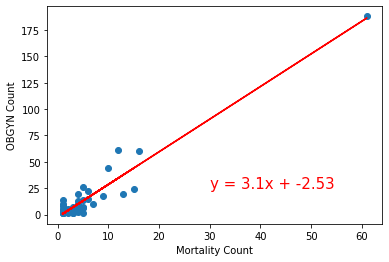

In [470]:
x_values = final_df['Deaths/YR'].astype('float')
y_values = final_df['OB/GYNS'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,25),fontsize=15,color="red")
plt.xlabel('Mortality Count')
plt.ylabel('OBGYN Count')
print(f"R squard: {rvalue}")
print(f"P Value: {pvalue}")
plt.savefig("../project1/count_scatterplot.png")
plt.show()

R squard: 0.9589052665480893
P Value: 1.0537535028704876e-25


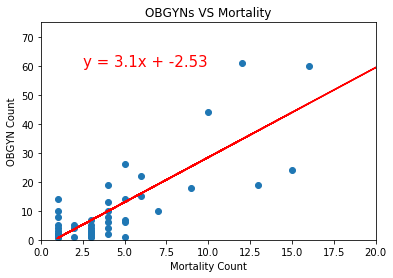

In [471]:
x_values = final_df['Deaths/YR'].astype('float')
y_values = final_df['OB/GYNS'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlim(0,20)
plt.ylim(0,75)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2.5,60),fontsize=15,color="red")
plt.title("OBGYNs VS Mortality")
plt.xlabel('Mortality Count')
plt.ylabel('OBGYN Count')
print(f"R squard: {rvalue}")
print(f"P Value: {pvalue}")
plt.savefig("../project1/zoom_count_scatterplot.png")
plt.show()

R squard: -0.0968815217189575
P Value: 0.5218420011533313


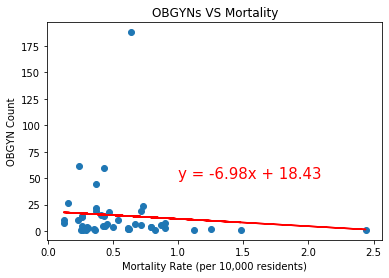

In [472]:
x_values = final_df['Deaths/10000'].astype('float')
y_values = final_df['OB/GYNS'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,50),fontsize=15,color="red")
plt.title("OBGYNs VS Mortality")
plt.xlabel('Mortality Rate (per 10,000 residents)')
plt.ylabel('OBGYN Count')
print(f"R squard: {rvalue}")
print(f"P Value: {pvalue}")
plt.savefig("../project1/per10000_scatterplot.png")
plt.show()

R squard: 0.22290816690220247
P Value: 0.03269756079443546


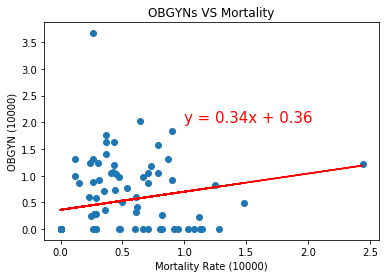

In [473]:
x_values = complete_df['Year Deaths per 10000 Residents'].astype('float')
y_values = complete_df['OB/GYNS Per Cap'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,2),fontsize=15,color="red")
plt.title("OBGYNs VS Mortality")
plt.xlabel('Mortality Rate (10000)')
plt.ylabel('OBGYN (10000)')
print(f"R squard: {rvalue}")
print(f"P Value: {pvalue}")
plt.savefig("../project1/per10000_scatterplot.png")
plt.show()

In [487]:
complete_df.head()

,Unnamed: 0,Unnamed: 0.1,County,Deaths,OB/GYNS,OB/GYNS Per Cap,Lat,Lat2,Lng,Death Year,Deaths per Year,Year Deaths per 10000 Residents,Population
0,46,0,Adams,0,0,0.00,40.55,41.05,-84.95,2018,4,1.13,34880
1,0,0,Allen,16,60,1.64,40.90,41.15,-85.05,2018,16,0.43,365178
2,1,1,Bartholomew,1,8,1.00,39.00,39.50,-85.85,2018,1,0.12,79711
3,47,0,Benton,0,0,0.00,40.45,40.95,-87.30,0,0,0.00,8731
4,48,0,Blackford,0,0,0.00,40.05,40.55,-85.40,2018,1,0.82,12498


In [489]:
# Mean, median, mode for Poverty Rate
mortality_mean = round(deaths_2018_df['Deaths/YR'].astype('float').mean(), 2)
mortality_median = round(deaths_2018_df['Deaths/YR'].astype('float').median(), 2)
mortality_mode = round(deaths_2018_df['Deaths/YR'].astype('float').mode(), 2)

print(f"County deaths per year Mean: {mortality_mean}")
print(f"County deaths per year Median: {mortality_median}")
print(f"County deaths per year Mode: {mortality_mode}")

obgyn_mean = round(final_df['OB/GYNS'].astype('float').mean(), 2)
obgyn_median = round(final_df['OB/GYNS'].astype('float').median(), 2)
obgyn_mode = round(final_df['OB/GYNS'].astype('float').mode(), 2)

print(f"OB/GYN count Mean: {obgyn_mean}")
print(f"OB/GYN count Median: {obgyn_median}")
print(f"OB/GYN count Mode: {obgyn_mode}")

population_mean = round(complete_df['Population'].astype('float').mean(), 2)
population_median = round(complete_df['Population'].astype('float').median(), 2)
population_mode = round(complete_df['Population'].astype('float').mode(), 2)

print(f"Population Mean: {population_mean}")
print(f"Population Median: {population_median}")
print(f"Population Mode: {population_mode}")

County deaths per year Mean: 4.46
County deaths per year Median: 3.0
County deaths per year Mode: 0    1.0
dtype: float64
OB/GYN count Mean: 14.5
OB/GYN count Median: 5.5
OB/GYN count Mode: 0    1.0
dtype: float64
Population Mean: 71141.86
Population Median: 33978.0
Population Mode: 0    0.0
dtype: float64


R squard: -0.11246653194030536
P Value: 0.2857991159755545


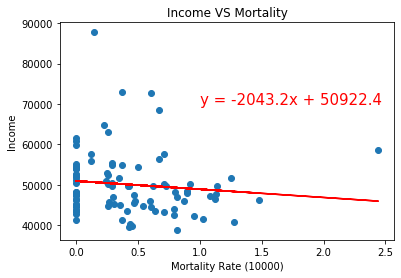

In [490]:
x_values = complete_df['Year Deaths per 10000 Residents'].astype('float')
y_values = income_df['est'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,70000),fontsize=15,color="red")
plt.title("Income VS Mortality")
plt.xlabel('Mortality Rate (10000)')
plt.ylabel('Income')
print(f"R squard: {rvalue}")
print(f"P Value: {pvalue}")
plt.savefig("../project1/income_scatterplot.png")
plt.show()